<a href="https://colab.research.google.com/github/ilyes-frag/houses-prices-kaggle-competition/blob/main/house_prices_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


# **1-Data Load**

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#let's save first the ID columns 
train_Id=train['Id']
test_Id=test['Id']
#let's drop the ID columns sinse it's unnessesary for the predection process
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


# **2. First things first: analysing 'SalePrice'**


In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

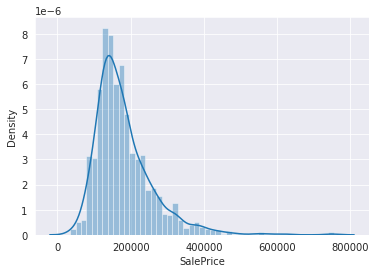

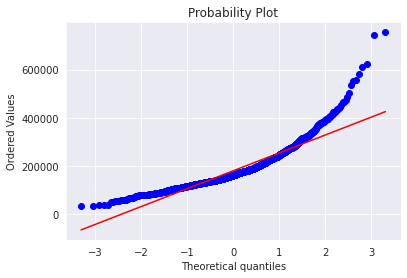

In [ ]:
sns.distplot(train['SalePrice'])#to plot the saleprice and we see The target variable is right skewed (positive skewed)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)#plot the probabilté saleprices plot
plt.show()


As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.
for that we use the Log transformation to ,ormally distribuet the target

# **Log-transformation of the target variable**



In [ ]:
#for the transformation log
train['SalePrice']=np.log1p(train['SalePrice'])

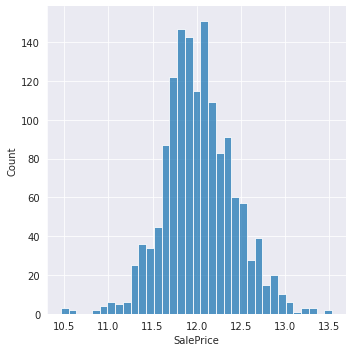

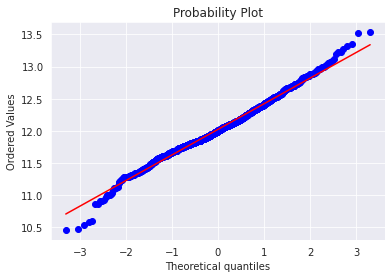

In [ ]:
#check the new distrubution
sns.displot(train['SalePrice'])
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)#plot the probabilté saleprices plot
plt.show()

The skew seems now corrected and the data appears more normally distributed.



# **1-Features engineering**




**begin** with the correlation (numerical features with the saleprice)

In [ ]:
#list of numerical columns
list_num_colm=train.select_dtypes(include='number')
list_num_colm

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,11.864469


In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [ ]:
#print the correlation between the saleprice and the numerical features
correlation=list_num_colm.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64 



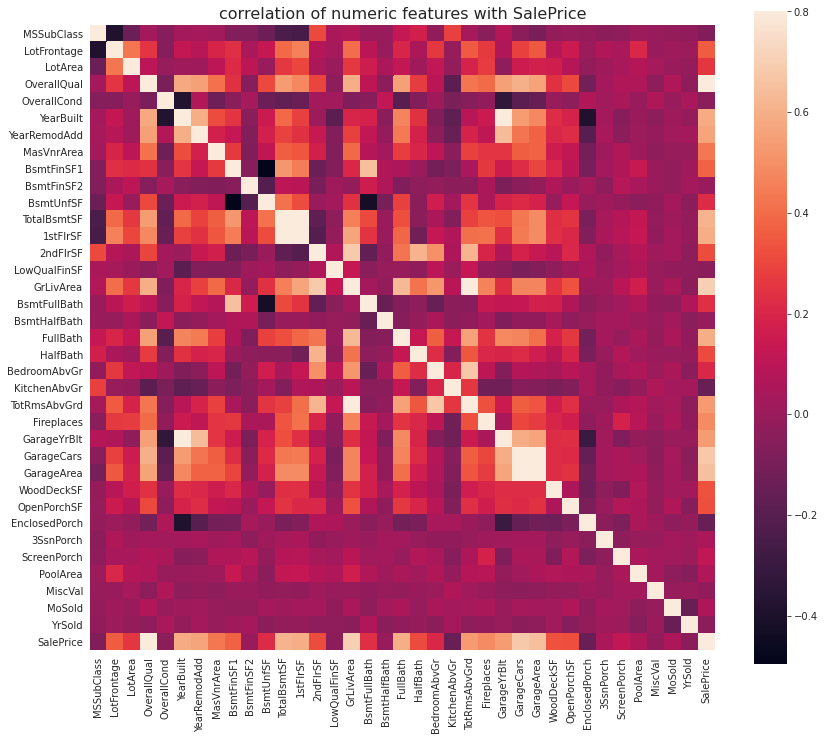

In [ ]:
#plot the heatmap to visualise the correlation
f , ax=plt.subplots(figsize=(14,12))
plt.title('correlation of numeric features with SalePrice',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')


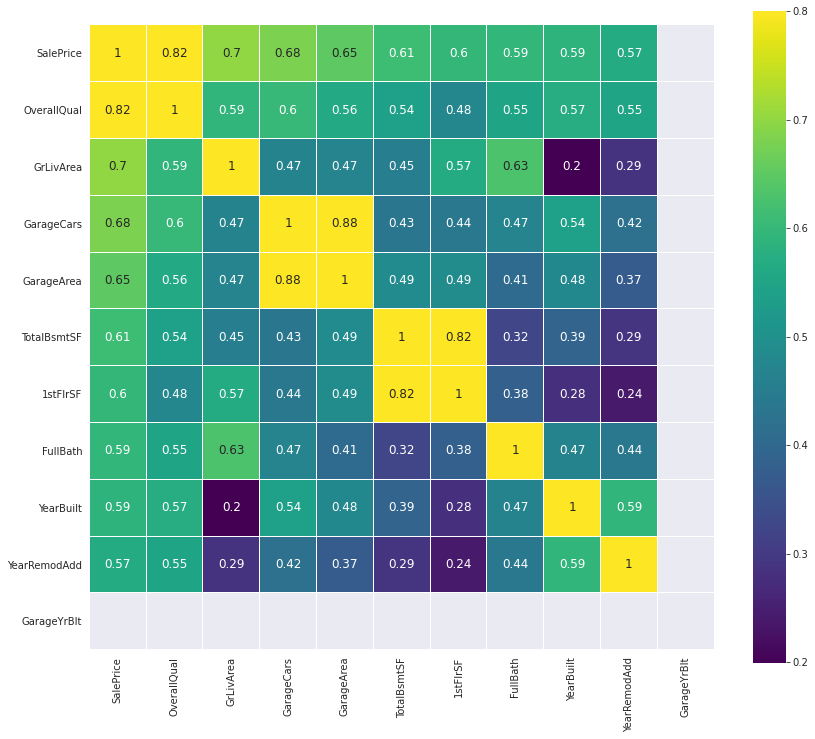

In [ ]:
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm=np.corrcoef(train[cols].values.T)
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
           linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

 * 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly 
correlated with 'SalePrice'. Check!
 * 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area.
 * 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
 * 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF'
 * 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again

In [ ]:
#drop one columns on the duplicated columns
all_data.drop (['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1, inplace=True)

In [ ]:
all_data.shape


(2919, 76)

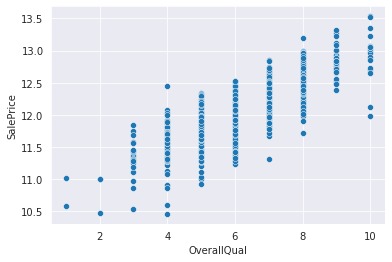

In [ ]:
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")

sns.scatterplot(data=train,x="OverallQual",y="SalePrice")

We can see at the bottom right two huge oultliers
let's remove the oultliers

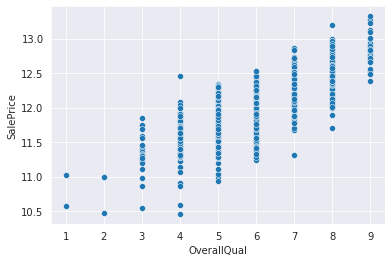

In [ ]:
train=train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<300000)].index)
sns.scatterplot(data=train,x='OverallQual',y='SalePrice')

**GrLivArea**

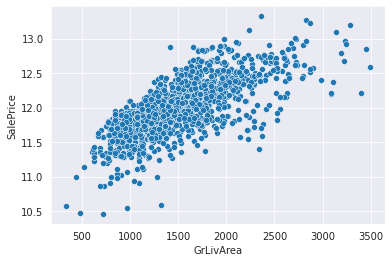

In [ ]:
sns.scatterplot(x=train["GrLivArea"],y=train["SalePrice"])

let's first concatenate the train and test data in the same dataframe



In [ ]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,854,0,1710,1.0,0.0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,0,1262,0.0,1.0,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,866,0,1786,1.0,0.0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,756,0,1717,1.0,0.0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1053,0,2198,1.0,0.0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# **1- see and handle with missing values :**

---






In [ ]:
#this function for see how missing values we have 
features_with_na=[features for features in all_data.columns if all_data[features].isnull().sum()]
print(features_with_na)
for features in features_with_na:
  print(features,np.round(all_data[features].isnull().mean(),4),'% missing values')

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
MSZoning 0.0014 % missing values
LotFrontage 0.1665 % missing values
Alley 0.9322 % missing values
Utilities 0.0007 % missing values
Exterior1st 0.0003 % missing values
Exterior2nd 0.0003 % missing values
MasVnrType 0.0082 % missing values
MasVnrArea 0.0079 % missing values
BsmtQual 0.0277 % missing values
BsmtCond 0.0281 % missing values
BsmtExposure 0.0281 % missing values
BsmtFinType1 0.0271 % missing values
BsmtFinSF1 0.0003 % missing values
BsmtFinType2 0.0274 % missing values
BsmtFinSF2 0.0003 % missing values
BsmtUnfSF 0.0003 % 

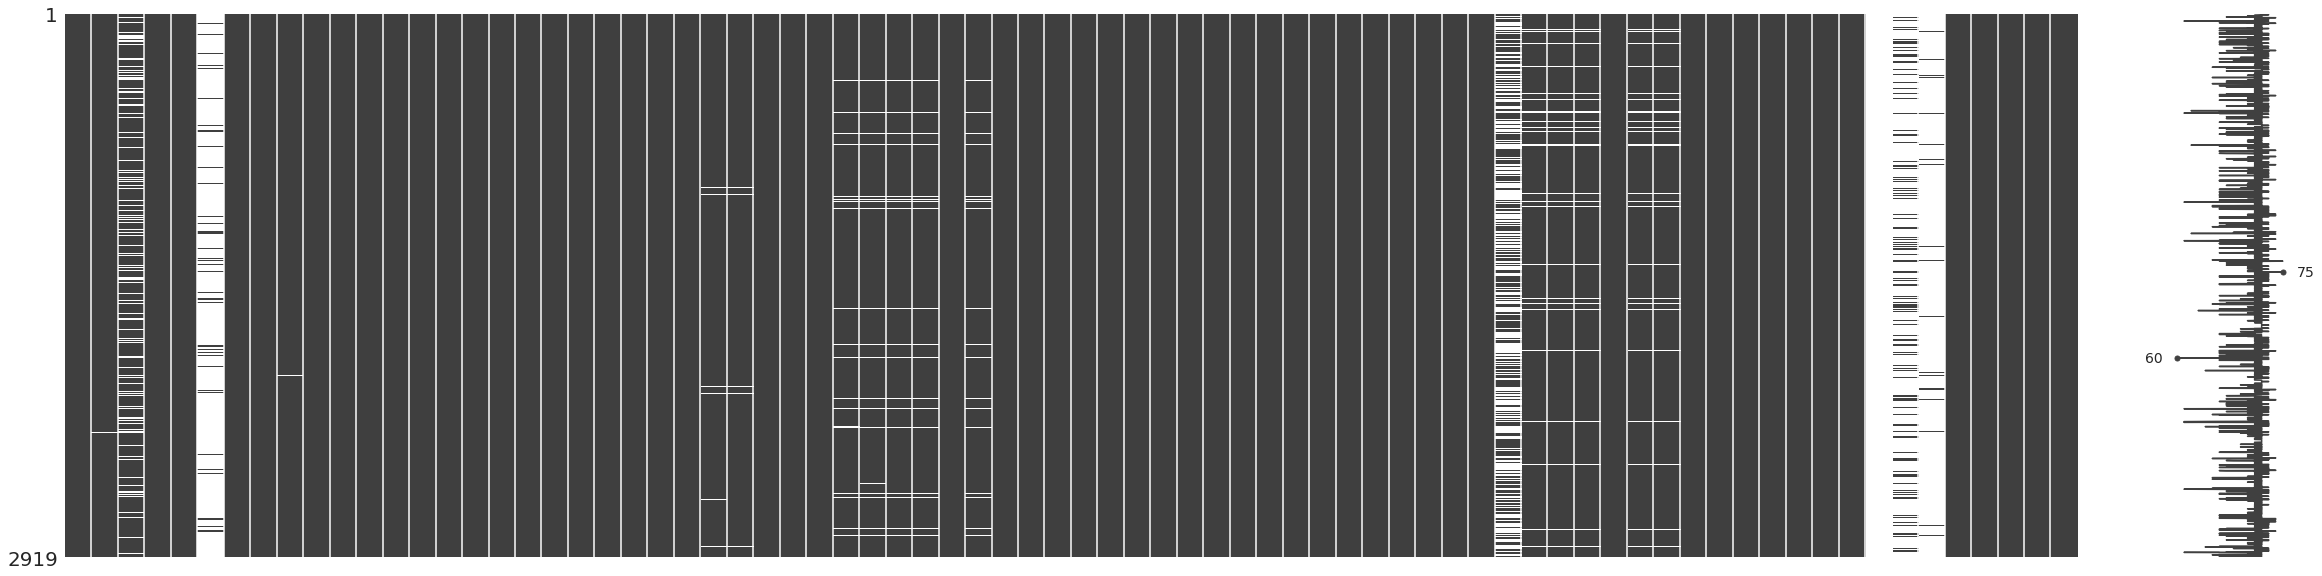

In [ ]:
missingno.matrix(all_data,figsize=(40,10))

## **Fill Nan values**

1.   --------------->int/float--------->mean,median
2.   --------------->object------------>mode



In [ ]:
#fonction to fillna null values in 2 type(numerical and object)
#def fillna_all(df):
  #for col in lis_obj_colm:
   # df[col].fillna(value=df[col].mode()[0],inplace=True)
  #or col in list_num_colm:
    #df[col].fillna(value=df[col].mean(),inplace=True)

In [ ]:
#list of categorical values to fillna with 'None' value
my_None_list=train[['PoolQC','Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageFinish','GarageQual','GarageCond','Fence','MiscFeature']]

In [ ]:
#change the Nan value to "None" values in this categorical columns list because "Nan" mean in this case dont have this item for exemple in "PoolQC" "Nan" mean it dont have a POOL in this house
for col in my_None_list:
  all_data[col] = all_data[col].fillna("None")


In [ ]:
all_data['PoolQC'].isnull().sum()

0

In [ ]:
all_data['PoolQC'].head()

0    None
1    None
2    None
3    None
4    None
Name: PoolQC, dtype: object

**Neighborhood**



In [ ]:
all_data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

**LotFrontage**

In [ ]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
all_data['LotFrontage'].head(20)

0     65.0
1     80.0
2     68.0
3     60.0
4     84.0
5     85.0
6     75.0
7     80.0
8     51.0
9     50.0
10    70.0
11    85.0
12    72.0
13    91.0
14    73.0
15    51.0
16    73.0
17    72.0
18    66.0
19    70.0
Name: LotFrontage, dtype: float64

**MasVnrArea**

In [ ]:
#fillna "MasVnrArea"with 0
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

In [ ]:
all_data['MasVnrArea'].isnull().sum()

0

**Electrical**

In [ ]:
all_data['Electrical'].isnull().sum()

1

In [ ]:
#It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'].describe()

count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [ ]:
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

**GarageYrBlt**

In [ ]:
all_data['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [ ]:
#Replacing missing data with 0 (Since No garage = no cars in such garage.)
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(0)
all_data['GarageYrBlt'].isnull().sum()

0

In [ ]:
#fonction to see the missing values
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
MSZoning,0.137033
Functional,0.068517
BsmtHalfBath,0.068517
BsmtFullBath,0.068517
Utilities,0.068517
SaleType,0.034258
GarageCars,0.034258
KitchenQual,0.034258
TotalBsmtSF,0.034258
BsmtUnfSF,0.034258


**MSZoning**

In [ ]:
all_data['MSZoning'].describe()

count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object

In [ ]:
#'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

**Functional**

In [ ]:
all_data['Functional'].describe()

count     2917
unique       7
top        Typ
freq      2717
Name: Functional, dtype: object

In [ ]:
#data description says NA means typical
all_data['Functional']=all_data['Functional'].fillna("Typ")

**BsmtHalfBath**

In [ ]:
all_data['BsmtHalfBath'].describe()

count    2917.000000
mean        0.061364
std         0.245687
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [ ]:
#missing values are likely zero for having no basement
for col in ('BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF'):
  all_data[col]=all_data[col].fillna(0)

**Utilities**

In [ ]:
all_data['Utilities'].describe()

count       2917
unique         2
top       AllPub
freq        2916
Name: Utilities, dtype: object

In [ ]:
#For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data=all_data.drop(['Utilities'],axis=1)

**SaleType**

In [ ]:
all_data['SaleType'].describe()

count     2918
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object

In [ ]:
#Fill in again with most frequent which is "WD"
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


**GarageCars**

In [ ]:
all_data['GarageCars'].describe()

count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [ ]:
#Replacing missing data with 0 (Since No garage = no cars in such garage.)
all_data['GarageCars']=all_data['GarageCars'].fillna(0)

**KitchenQual**

In [ ]:
all_data['KitchenQual'].describe()

count     2918
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object

In [ ]:
#Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
all_data['KitchenQual'].isnull().sum()

0

**Exterior2nd**

In [ ]:
all_data['Exterior2nd'].describe()

count        2918
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object

In [ ]:
#We will just substitute in the most common string
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])


In [ ]:
all_data['Exterior2nd'].isnull().sum()

0

**Exterior1st**

In [ ]:
all_data['Exterior1st'].describe()

count        2918
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

In [ ]:
#We will just substitute in the most common string
all_data['Exterior1st']=all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])


In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio


More features engeneering

**let's Transforming some numerical variables that are really categorical**



In [ ]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,854,0,1710,1.0,0.0,2,1,3,1,Gd,Typ,0,None,Attchd,2003.0,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,0,1262,0.0,1.0,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,866,0,1786,1.0,0.0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,756,0,1717,1.0,0.0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1053,0,2198,1.0,0.0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [ ]:
all_data.shape

(2919, 75)

In [ ]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.542994,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,0.597122,1870.364166,1.766016,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,21.703256,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,0.646129,449.686321,0.762196,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1957.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,1977.000000,2.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2001.000000,2.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,4.000000,2207.000000,5.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
all_data['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


In [ ]:
all_data['MSSubClass'].describe()

count     2919
unique      16
top         20
freq      1079
Name: MSSubClass, dtype: object

In [ ]:
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


In [ ]:
all_data['OverallCond'].describe()

count     2919
unique       9
top          5
freq      1645
Name: OverallCond, dtype: object

In [ ]:
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**highly skewed features(numerical) and Normalize the data with Logarithm**


In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index


In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [ ]:
#Normalize the data with Logarithms
all_data[numeric_feats] = all_data[numeric_feats].apply(lambda x:np.log1p(x))

# **3-encoder categorical columns with dummies**

In [ ]:
cat_colm_all_data=all_data.select_dtypes(include='object')

In [ ]:
#loop to see categories in ich column
for col in cat_colm_all_data:
  print(col,':',train[col].nunique())

MSSubClass : 15
MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 6
BldgType : 5
HouseStyle : 8
OverallCond : 9
RoofStyle : 6
RoofMatl : 7
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
PoolQC : 3
Fence : 4
MiscFeature : 4
MoSold : 12
YrSold : 5
SaleType : 9
SaleCondition : 6


In [ ]:
for col in cat_colm_all_data:
    dumm = pd.get_dummies(all_data[col], prefix=col, dtype=int,drop_first=True)
    all_data = pd.concat([all_data,dumm], axis=1)

In [ ]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,5,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.945910,8,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,5,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.079442,5,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.197225,5,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,1.609438,7,7.586296,7.586296,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,6.304449,6.304449,GasA,Gd,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,1.609438,5,7.586296,7.586296,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,5.533389,Unf,0.0,5.686975,6.304449,GasA,TA,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,1.791759,7,7.581210,7.599401,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,ALQ,7.110696,Unf,0.0,0.000000,7.110696,GasA,Ex,Y,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,1.791759,5,7.597396,7.597396,Gable,CompShg,HdBoard,Wd Shng,None,0.000000,TA,TA,PConc,Gd,TA,Av,GLQ,5.823046,Unf,0.0

In [ ]:
#drop the object columns to replace that with the encoder collumns
all_data.drop(cat_colm_all_data,axis=1,inplace=True)

In [ ]:
all_data.shape

(2919, 289)

# **let's separate the data**

In [ ]:
#let's creat x_train and x_test
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
y_train.shape

(1460,)

# **Modelling**

1-first import the libraries

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

**Define a cross validation strategy**



In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Base models :**

**LASSO Regression :**
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline



In [ ]:
lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


**Elastic Net Regression :**
again made robust to outliers

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

**Kernel Ridge Regression :**

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

**Gradient Boosting Regression :**
With huber loss that makes it robust to outliers

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

**XGBoost :**

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

**LightGBM :**

In [ ]:
model_lgb=lgb.LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=2, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

**Base Model Score:**
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1273 (0.0120)



In [ ]:
score = rmsle_cv(ENet)
print("\nEnet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Enet score: 0.1275 (0.0121)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1303 (0.0114)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1255 (0.0123)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1263 (0.0101)



In [ ]:
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1268 (0.0094)



In [ ]:
score = rmsle_cv(model_lgb1)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1250 (0.0088)



grid search cv to Parameters Tuning in LGBM

In [ ]:
 from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[{'num_leaves':[0,5,7,10,20,30,40,50,100,127],
             'max_depth':[2,3,4,5,6,7,8],
             'min_data_in_leaf':[100,1000]}]

In [ ]:

kfold = KFold(n_splits=10)
grid =GridSearchCV(model_lgb,param_grid,cv=kfold,scoring='neg_mean_squared_error')

In [ ]:
grid.fit(train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=5,
                                     bagging_seed=9, boosting_type='gbdt',
                                     class_weight=None, colsample_bytree=1.0,
                                     feature_fraction=0.2319,
                                     feature_fraction_seed=9,
                                     importance_type='split',
                                     learning_rate=0.05, max_bin=55,
                                     max_depth=2, min_child_samples=...
                                     objective='regression', random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
      

In [ ]:
grid_best=grid.best_score_
print(grid_best)
grid_param=grid.best_params_
print(grid_param)
grid_estimator=grid.best_estimator_
print(grid_estimator)

-0.019444891139584024
{'max_depth': 6, 'min_data_in_leaf': 100, 'num_leaves': 7}
LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=6, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=100, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=7, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


# **Stacking models**
Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1229 (0.0118)



In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
stacking_model=StackingRegressor([('model_lgb1',model_lgb1),
                                  ('KRR',KRR),
                                  ('GBoost',GBoost)],
                                 final_estimator=xgb.XGBRegressor())
stacking_model.fit(train,y_train)


[12:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=None,
                  estimators=[('model_lgb1',
                               LGBMRegressor(bagging_fraction=0.8,
                                             bagging_freq=5, bagging_seed=9,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.2319,
                                             feature_fraction_seed=9,
                                             importance_type='split',
                                             learning_rate=0.05, max_bin=55,
                                             max_depth=-1, min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_data_in_le...
                                               colsample_bynode=1,
                   

In [ ]:
score = rmsle_cv(stacking_model)
print("stacking_model score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[12:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
stacking_model score: 0.1242 (0.0117)



# **submission**

In [ ]:
y_stacking = np.expm1(stacking_model.predict(test))

In [ ]:
y_stacking

array([209636.02, 179262.14, 216960.6 , ..., 257002.33, 142653.55,
       149627.2 ], dtype=float32)

In [ ]:
pred=pd.DataFrame(y_stacking)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']

datasets.to_csv('my submission6.csv',index=False)